In [242]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

In [65]:
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 33)

In [3]:
gov_pop_area_data = pd.read_excel('/Users/Rohil/Documents/iGEM/yemen/gov_area_pop_data.xlsx')

In [4]:
# ignoring hadramawut because we don't have enough data for it
gov_pop_area_data = gov_pop_area_data[gov_pop_area_data.iso != 'YE-HD']

In [5]:
ymn_conflict_data = pd.read_csv('/Users/Rohil/Documents/iGEM/yemen/conflict_data.csv')

In [6]:
ymn_conflict_data.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,NaN,#country+code,#event+code,NaN,#date+occurred,NaN,NaN,#event+type,#group+name+first,#group+name+first+assoc,NaN,#group+name+second,#group+name+second+assoc,NaN,NaN,#region+name,#country+name,#adm1+name,#adm2+name,#adm3+name,#loc+name,#geo+lat,#geo+lon,NaN,#meta+source,NaN,#description,#affected+killed,NaN,NaN
1,1735012.0,887,YEM22099,22099.0,2018-07-28,2018.0,1.0,Remote violence,Operation Restoring Hope,NaN,8.0,NaN,NaN,0.0,80.0,Middle East,Yemen,Amanat al Asimah,Bani Al Harith,NaN,Sanaa-Sanaa International Airport,15.4763,44.2197,1.0,Mareb Press,Subnational,Six Saudi-led coalition airstrikes were report...,0,1.532986e+09,YEM
2,1735015.0,887,YEM22102,22102.0,2018-07-28,2018.0,1.0,Remote violence,Operation Restoring Hope,NaN,8.0,NaN,NaN,0.0,80.0,Middle East,Yemen,Al Hudaydah,Zabid,NaN,Zabid,14.1951,43.3152,1.0,United Nations,Other,Saudi-led airstrikes hit areas near a reproduc...,0,1.532986e+09,YEM
3,1734903.0,887,YEM21990,21990.0,2018-07-27,2018.0,1.0,Battle-No change of territory,Military Forces of Yemen (2016-) Supreme Polit...,NaN,1.0,Military Forces of Yemen (2012-),Militia (Pro-Government),1.0,11.0,Middle East,Yemen,Al Jawf,Al Maslub,NaN,Al Maslub,16.1827,44.6261,2.0,Yemen News Agency (SABA),National,Pro-Houthi snipers reportedly shot dead 2 anti...,2,1.532986e+09,YEM
4,1734904.0,887,YEM21991,21991.0,2018-07-27,2018.0,1.0,Battle-No change of territory,Military Forces of Yemen (2016-) Supreme Polit...,NaN,1.0,Military Forces of Yemen (2012-),Militia (Pro-Government),1.0,11.0,Middle East,Yemen,Marib,Mahliyah,NaN,Qaniyah,14.5712,45.2700,1.0,Yemen News Agency (SABA),National,Pro-Houthi forces claim to have stopped an att...,6,1.532986e+09,YEM


In [7]:
ymn_conflict_data = ymn_conflict_data.iloc[1:]
ymn_conflict_data

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
1,1735012.0,887,YEM22099,22099.0,2018-07-28,2018.0,1.0,Remote violence,Operation Restoring Hope,NaN,8.0,NaN,NaN,0.0,80.0,Middle East,Yemen,Amanat al Asimah,Bani Al Harith,NaN,Sanaa-Sanaa International Airport,15.4763,44.2197,1.0,Mareb Press,Subnational,Six Saudi-led coalition airstrikes were report...,0,1.532986e+09,YEM
2,1735015.0,887,YEM22102,22102.0,2018-07-28,2018.0,1.0,Remote violence,Operation Restoring Hope,NaN,8.0,NaN,NaN,0.0,80.0,Middle East,Yemen,Al Hudaydah,Zabid,NaN,Zabid,14.1951,43.3152,1.0,United Nations,Other,Saudi-led airstrikes hit areas near a reproduc...,0,1.532986e+09,YEM
3,1734903.0,887,YEM21990,21990.0,2018-07-27,2018.0,1.0,Battle-No change of territory,Military Forces of Yemen (2016-) Supreme Polit...,NaN,1.0,Military Forces of Yemen (2012-),Militia (Pro-Government),1.0,11.0,Middle East,Yemen,Al Jawf,Al Maslub,NaN,Al Maslub,16.1827,44.6261,2.0,Yemen News Agency (SABA),National,Pro-Houthi snipers reportedly shot dead 2 anti...,2,1.532986e+09,YEM
4,1734904.0,887,YEM21991,21991.0,2018-07-27,2018.0,1.0,Battle-No change of territory,Military Forces of Yemen (2016-) Supreme Polit...,NaN,1.0,Military Forces of Yemen (2012-),Militia (Pro-Government),1.0,11.0,Middle East,Yemen,Marib,Mahliyah,NaN,Qaniyah,14.5712,45.2700,1.0,Yemen News Agency (SABA),National,Pro-Houthi forces claim to have stopped an att...,6,1.532986e+09,YEM
5,1734918.0,887,YEM22005,22005.0,2018-07-27,2018.0,1.0,Battle-No change of territory,Military Forces of Yemen (2012-),NaN,1.0,Private Security Forces (Yemen),NaN,8.0,18.0,Middle East,Yemen,Aden,Al Mualla,NaN,Aden-Al Maalla,12.7899,45.0024,1.0,Yemen Saeed,Subnational,27 July: Soldiers from a local brigade in Aden...,1,1.532986e+09,YEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22035,1622500.0,887,YEM11771,11771.0,2016-01-01,2016.0,1.0,Remote violence,Operation Restoring Hope,NaN,8.0,Military Forces of Yemen (2015-2016) Supreme R...,NaN,1.0,18.0,Middle East,Yemen,Taizz,Al Misrakh,NaN,Al Misrakh,13.4606,44.0204,2.0,Local Source Project,Local,Coalition airstrikes hit weapon storage in Al ...,0,1.528152e+09,YEM
22036,1622501.0,887,YEM11772,11772.0,2016-01-01,2016.0,1.0,Remote violence,Operation Restoring Hope,NaN,8.0,NaN,NaN,0.0,80.0,Middle East,Yemen,Taizz,Dimnat Khadir,NaN,Ad Dimnah,13.4540,44.1817,2.0,Local Source Project,Local,Coalition airstrikes hit figure in Dimnat Khadir,0,1.528152e+09,YEM
22037,1622502.0,887,YEM11773,11773.0,2016-01-01,2016.0,1.0,Remote violence,Military Forces of Yemen (2015-2016) Supreme R...,NaN,1.0,Popular Resistance,NaN,3.0,13.0,Middle East,Yemen,Taizz,Salh,NaN,Taizz,13.5795,44.0209,3.0,Associated Press,International,Houthi fighters shelled areas west and south o...,4,1.528152e+09,YEM
22038,1622503.0,887,YEM11774,11774.0,2016-01-01,2016.0,1.0,Remote violence,Military Forces of Yemen (2015-2016) Supreme R...,NaN,1.0,Civilians (Yemen),NaN,7.0,17.0,Middle East,Yemen,Taizz,Salh,NaN,Taizz,13.5795,44.0209,1.0,Associated Press,International,Houthi fighters shelled residential areas in t...,5,1.528152e+09,YEM


In [8]:
ymn_conflict_data.admin1.unique()

array(['Amanat al Asimah', 'Al Hudaydah', 'Al Jawf', 'Marib', 'Aden',
       'Taizz', 'Sadah', 'Amran', 'Hajjah', 'Al Bayda', 'Ad Dali',
       'Abyan', 'Lahij', 'Shabwah', 'Dhamar', 'Ibb', 'Sanaa', 'Al Mahrah',
       'Al Mahwit', 'Raymah', 'Hadramawt', 'Suqutra'], dtype=object)

In [9]:
sorted(ymn_conflict_data.admin2.unique())

['Abs',
 'Ad Dahi',
 'Ad Dhalee',
 'Ad Dis',
 'Ad Durayhimi',
 'Adh Dhliaah',
 'Aflah Al Yaman',
 'Ahwar',
 'Ain',
 'Al Abdiyah',
 'Al Abr',
 'Al Arsh',
 'Al Ashah',
 'Al Azariq',
 'Al Bayda',
 'Al Bayda City',
 'Al Buraiqeh',
 'Al Dhaher',
 'Al Dhihar',
 'Al Garrahi',
 'Al Ghaydah',
 'Al Ghayl',
 'Al Had',
 'Al Hada',
 'Al Hajjaylah',
 'Al Hali',
 'Al Hashwah',
 'Al Hawak',
 'Al Hawtah',
 'Al Haymah Ad Dakhiliyah',
 'Al Haymah Al Kharijiyah',
 'Al Hazm',
 'Al Humaydat',
 'Al Husha',
 'Al Hussein',
 'Al Jabin',
 'Al Jamimah',
 'Al Jubah',
 'Al Khabt',
 'Al Khawkhah',
 'Al Maafer',
 'Al Madan',
 'Al Madaribah Wa Al Arah',
 'Al Mahabishah',
 'Al Mahfad',
 'Al Mahwait',
 'Al Mahwait City',
 'Al Makhadir',
 'Al Malagim',
 'Al Manar',
 'Al Mansura',
 'Al Mansuriyah',
 'Al Maqatirah',
 'Al Marawiah',
 'Al Mashannah',
 'Al Maslub',
 'Al Matammah',
 'Al Maton',
 'Al Mawasit',
 'Al Miftah',
 'Al Milah',
 'Al Mina',
 'Al Misrakh',
 'Al Mualla',
 'Al Mudhaffar',
 'Al Mukalla',
 'Al Mukalla City',

In [10]:
almuk = ymn_conflict_data[(ymn_conflict_data.admin1 == 'Hadramawt') & (ymn_conflict_data.admin2 == 'Al Mukalla')]

In [11]:
ymn_conflict_data = ymn_conflict_data[ymn_conflict_data.admin1 != 'Hadramawt'].append(almuk)

In [12]:
neighboring_gov_dict = {"YE-SA" : ["YE-SN"], 
                        "YE-AB" : ["YE-LA", "YE-SH", "YE-BA"], 
                        "YE-AD" : ["YE-LA"], 
                        "YE-DA" : ["YE-LA", "YE-TA", "YE-IB", "YE-BA"], 
                        "YE-BA" : ["YE-DH", "YE-IB", "YE-DA", "YE-AB", "YE-SH", "YE-MA", "YE-SN"], 
                        "YE-HU" : ["YE-HJ", "YE-MW", "YE-SN", "YE-RA", "YE-DH", "YE-TA"], 
                        "YE-JA" : ["YE-MA", "YE-SN", "YE-AM", "YE-SD"], 
                        "YE-MR" : ["YE-HD-AL"], 
                        "YE-MW" : ["YE-HU", "YE-HJ", "YE-AM", "YE-SN"], 
                        "YE-AM" : ["YE-HJ", "YE-SD", "YE-JA", "YE-SN", "YE-MW"], 
                        "YE-DH" : ["YE-IB", "YE-RA", "YE-SN", "YE-BA"], 
                        "YE-HD-AL" : ["YE-SH", "YE-MR"], 
                        "YE-HJ" : ["YE-MW", "YE-HU", "YE-MR"], 
                        "YE-IB" : ["YE-TA", "YE-HU", "YE-DH", "YE-BA", "YE-DA"], 
                        "YE-LA" : ["YE-AD", "YE-TA", "YE-DA", "YE-BA", "YE-AB"], 
                        "YE-MA" : ["YE-BA", "YE-SN", "YE-JA", "YE-SH"], 
                        "YE-RA" : ["YE-DH", "YE-HU", "YE-SN"], 
                        "YE-SD" : ["YE-HJ", "YE-AM", "YE-JA"], 
                        "YE-SN" : ["YE-BA", "YE-DH", "YE-RA", "YE-MW", "YE-AM", "YE-JA", "YE-MA"], 
                        "YE-SH" : ["YE-AB", "YE-BA", "YE-MA", "YE-HD-AL"], 
                        "YE-TA" : ["YE-LA", "YE-DA", "YE-IB", "YE-HU"]}

In [13]:
governorate_iso_replace_dict = {'Lahij':"YE-LA", 'Taizz':"YE-TA", 
                                'Sadah':"YE-SD", 'Hajjah':"YE-HJ", 'Al Hudaydah':"YE-HU", 'Sanaa':"YE-SN",'Al Jawf':"YE-JA", 'Al Bayda':"YE-BA", 'Abyan':"YE-AB", 'Ibb':"YE-IB", 'Aden':"YE-AD", 'Marib':"YE-MA",
       'Hadramawt':"YE-HD-AL", 'Shabwah':"YE-SH", 'Ad Dali':"YE-DA", 'Amanat al Asimah':"YE-SA", 'Amran':"YE-AM",
       'Al Mahrah':"YE-MR", 'Dhamar':"YE-DH", 'Al Mahwit':"YE-MW", 'Raymah':"YE-RA"}

In [14]:
ymn_conflict_data['gov_iso'] = ymn_conflict_data.admin1.map(governorate_iso_replace_dict)

In [15]:
ymn_conflict_data['date'] = pd.to_datetime(ymn_conflict_data.event_date, format = '%Y-%m-%d')

In [16]:
ymn_conflict_data = ymn_conflict_data.loc[:, ["date", "gov_iso", "fatalities", "event_date", "event_type"]]

In [17]:
ymn_conflict_data.head()

,date,gov_iso,fatalities,event_date,event_type
1,2018-07-28,YE-SA,0,2018-07-28,Remote violence
2,2018-07-28,YE-HU,0,2018-07-28,Remote violence
3,2018-07-27,YE-JA,2,2018-07-27,Battle-No change of territory
4,2018-07-27,YE-MA,6,2018-07-27,Battle-No change of territory
5,2018-07-27,YE-AD,1,2018-07-27,Battle-No change of territory


In [18]:
ymn_conflict_data.fatalities = ymn_conflict_data.fatalities.map(int)

In [19]:
conflict_crosstab = ymn_conflict_data.pivot_table(index = 'date', columns = 'gov_iso', values = 'fatalities', aggfunc = 'sum').fillna(0)

In [20]:
norm_conflict_crosstab = conflict_crosstab

In [21]:
for index, row in gov_pop_area_data[['iso', 'population']].iterrows():
    norm_conflict_crosstab[row.iso] = (norm_conflict_crosstab[row.iso] * 10000) / row.population

In [22]:
norm_conflict_crosstab.head()

gov_iso,YE-AB,YE-AD,YE-AM,YE-BA,YE-DA,YE-DH,YE-HD-AL,YE-HJ,YE-HU,YE-IB,YE-JA,YE-LA,YE-MA,YE-MR,YE-MW,YE-RA,YE-SA,YE-SD,YE-SH,YE-SN,YE-TA
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.091071,0.009194,0.0,0.000000,0.0,0.0,0.0,0.000000,0.005298,0.005114,0.075398,0.000000,0.217953,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.092218
2016-01-02,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.005298,0.000000,0.090478,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.020250,0.0,0.0,0.019761
2016-01-03,0.000000,0.211465,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.107957,0.000000,0.0,0.0,0.0,0.000000,0.040500,0.0,0.0,0.015370
2016-01-04,0.000000,0.000000,0.0,0.035899,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.237767,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2016-01-05,0.000000,0.045971,0.0,0.000000,0.0,0.0,0.0,0.105976,0.000000,0.025568,0.000000,0.000000,0.317023,0.0,0.0,0.0,0.076611,0.030375,0.0,0.0,0.002196


In [23]:
ymn_conflict_data.groupby(['gov_iso', 'date']).event_type.value_counts()

gov_iso  date        event_type                   
YE-AB    2016-01-01  Battle-No change of territory    1
         2016-01-04  Battle-No change of territory    1
         2016-01-13  Strategic development            1
         2016-01-15  Violence against civilians       1
         2016-01-26  Remote violence                  1
                                                     ..
YE-TA    2018-07-24  Battle-No change of territory    1
                     Strategic development            1
                     Violence against civilians       1
         2018-07-26  Remote violence                  1
         2018-07-27  Remote violence                  1
Name: event_type, Length: 10996, dtype: int64

In [24]:
cholera_case_crosstab = pd.read_csv(r'C:\Users\Rohil\Documents\iGEM\yemen\cholera_epi_data\yemen_weekly_case_data.csv', dayfirst = True)

In [25]:
norm_weekly_cholera_case_crosstab = cholera_case_crosstab
cholera_case_crosstab.set_index("date").unstack().reset_index(drop=True)

0       459.600000
1       466.800000
2       474.000000
3       481.200000
4       488.400000
           ...    
5560    121.714286
5561    117.285714
5562    112.857143
5563    108.428571
5564    104.000000
Length: 5565, dtype: float64

In [26]:
cholera_case_crosstab

,date,YE-AB,YE-AD,YE-AM,YE-BA,YE-DA,YE-DH,YE-HD-AL,YE-HJ,YE-HU,YE-IB,YE-JA,YE-LA,YE-MA,YE-MR,YE-MW,YE-RA,YE-SA,YE-SD,YE-SH,YE-SN,YE-TA
0,23-05-17,459.600000,621.200000,2788.200000,1430.400000,866.400000,1238.000000,0.000000,2215.800000,5254.799999,1029.200000,128.600000,271.0,100.600000,0.0,1538.400000,310.600000,3818.400000,20.0,3.0,2095.400000,2287.400000
1,24-05-17,466.800000,918.200000,2847.000000,1363.000000,849.000000,1265.400000,0.000000,2496.800000,5534.599999,1210.800000,132.000000,248.8,96.600000,0.0,1570.400000,316.000000,3690.000000,22.4,3.2,2135.400000,2208.600000
2,25-05-17,474.000000,1215.200000,2905.800000,1295.600000,831.600000,1292.800000,0.000000,2777.800000,5814.399999,1392.400000,135.400000,226.6,92.600000,0.0,1602.400000,321.400000,3561.600000,24.8,3.4,2175.400000,2129.800000
3,26-05-17,481.200000,1512.200000,2964.600000,1228.200000,814.200000,1320.200000,0.000000,3058.800000,6094.199999,1574.000000,138.800000,204.4,88.600000,0.0,1634.400000,326.800000,3433.200000,27.2,3.6,2215.400000,2051.000000
4,27-05-17,488.400000,1809.200000,3023.400000,1160.800000,796.800000,1347.600000,0.000000,3339.800000,6373.999999,1755.600000,142.200000,182.2,84.600000,0.0,1666.400000,332.200000,3304.800000,29.6,3.8,2255.400000,1972.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,07-02-18,1.142857,17.714286,212.142857,292.714286,0.428571,525.142857,0.428571,1.714286,845.857143,486.857143,27.285714,0.0,0.857143,0.0,309.571429,197.714286,629.285714,0.0,0.0,354.571429,121.714286
261,08-02-18,0.857143,16.285714,196.857143,295.285714,0.571429,503.857143,0.571429,1.285714,800.142857,495.142857,33.714286,0.0,1.142857,0.0,302.428571,198.285714,644.714286,0.0,0.0,364.428571,117.285714
262,09-02-18,0.571429,14.857143,181.571429,297.857143,0.714286,482.571429,0.714286,0.857143,754.428571,503.428571,40.142857,0.0,1.428571,0.0,295.285714,198.857143,660.142857,0.0,0.0,374.285714,112.857143
263,10-02-18,0.285714,13.428571,166.285714,300.428571,0.857143,461.285714,0.857143,0.428571,708.714286,511.714286,46.571429,0.0,1.714286,0.0,288.142857,199.428571,675.571429,0.0,0.0,384.142857,108.428571


In [27]:
for index, row in gov_pop_area_data[['iso', 'population']].iterrows():
    norm_weekly_cholera_case_crosstab[row.iso] = (norm_weekly_cholera_case_crosstab[row.iso] * 10000) / row.population
norm_weekly_cholera_case_crosstab

,date,YE-AB,YE-AD,YE-AM,YE-BA,YE-DA,YE-DH,YE-HD-AL,YE-HJ,YE-HU,YE-IB,YE-JA,YE-LA,YE-MA,YE-MR,YE-MW,YE-RA,YE-SA,YE-SD,YE-SH,YE-SN,YE-TA
0,23-05-17,6.976066,5.711380,24.813754,17.116538,14.377386,7.294939,0.000000,11.741123,13.920317,2.631505,1.939238,2.925646,1.993279,0.0,21.006063,6.181033,32.503467,0.202498,0.046047,9.191701,5.022349
1,24-05-17,7.085352,8.442031,25.337049,16.310012,14.088644,7.456394,0.000000,13.230091,14.661526,3.095828,1.990509,2.685981,1.914023,0.0,21.443006,6.288495,31.410484,0.226798,0.049117,9.367166,4.849331
2,25-05-17,7.194638,11.172681,25.860343,15.503486,13.799901,7.617849,0.000000,14.719059,15.402735,3.560151,2.041780,2.446315,1.834768,0.0,21.879950,6.395956,30.317501,0.251098,0.052187,9.542630,4.676313
3,26-05-17,7.303923,13.903331,26.383637,14.696960,13.511159,7.779304,0.000000,16.208027,16.143944,4.024474,2.093050,2.206650,1.755512,0.0,22.316893,6.503418,29.224519,0.275398,0.055256,9.718095,4.503295
4,27-05-17,7.413209,16.633982,26.906931,13.890435,13.222416,7.940759,0.000000,17.696996,16.885153,4.488797,2.144321,1.966984,1.676257,0.0,22.753837,6.610879,28.131536,0.299697,0.058326,9.893559,4.330277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,07-02-18,0.017347,0.162867,1.887978,3.502695,0.007112,3.094414,0.016603,0.009084,2.240732,1.244818,0.411458,0.000000,0.016983,0.0,4.227039,3.934574,5.356685,0.000000,0.000000,1.555366,0.267243
261,08-02-18,0.013010,0.149733,1.751942,3.533466,0.009483,2.968988,0.022137,0.006813,2.119632,1.266004,0.508398,0.000000,0.022644,0.0,4.129507,3.945945,5.488018,0.000000,0.000000,1.598606,0.257519
262,09-02-18,0.008673,0.136598,1.615906,3.564236,0.011853,2.843561,0.027671,0.004542,1.998532,1.287189,0.605339,0.000000,0.028306,0.0,4.031975,3.957317,5.619351,0.000000,0.000000,1.641845,0.247796
263,10-02-18,0.004337,0.123464,1.479870,3.595006,0.014224,2.718135,0.033206,0.002271,1.877432,1.308374,0.702279,0.000000,0.033967,0.0,3.934443,3.968688,5.750684,0.000000,0.000000,1.685085,0.238072


In [28]:
norm_conflict_crosstab

gov_iso,YE-AB,YE-AD,YE-AM,YE-BA,YE-DA,YE-DH,YE-HD-AL,YE-HJ,YE-HU,YE-IB,YE-JA,YE-LA,YE-MA,YE-MR,YE-MW,YE-RA,YE-SA,YE-SD,YE-SH,YE-SN,YE-TA
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.091071,0.009194,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.005298,0.005114,0.075398,0.000000,0.217953,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.092218
2016-01-02,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.005298,0.000000,0.090478,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.020250,0.0,0.0,0.019761
2016-01-03,0.000000,0.211465,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.107957,0.000000,0.0,0.0,0.0,0.000000,0.040500,0.0,0.0,0.015370
2016-01-04,0.000000,0.000000,0.0,0.035899,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.237767,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2016-01-05,0.000000,0.045971,0.0,0.000000,0.000000,0.0,0.0,0.105976,0.000000,0.025568,0.000000,0.000000,0.317023,0.0,0.0,0.0,0.076611,0.030375,0.0,0.0,0.002196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-24,0.000000,0.045971,0.0,0.000000,0.000000,0.0,0.0,0.052988,0.172189,0.000000,0.301592,0.010796,0.198139,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.004391
2018-07-25,0.000000,0.000000,0.0,0.191460,0.132755,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.198139,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2018-07-26,0.000000,0.000000,0.0,0.478650,0.000000,0.0,0.0,0.000000,0.015894,0.000000,0.000000,0.000000,0.059442,0.0,0.0,0.0,0.000000,0.020250,0.0,0.0,0.004391


In [29]:
conflict_unstacked = norm_conflict_crosstab.unstack().reset_index()
conflict_unstacked.columns = ['gov_iso', 'date', 'fatalities']

In [30]:
conflict_unstacked.head()

,gov_iso,date,fatalities
0,YE-AB,2016-01-01,0.091071
1,YE-AB,2016-01-02,0.000000
2,YE-AB,2016-01-03,0.000000
3,YE-AB,2016-01-04,0.000000
4,YE-AB,2016-01-05,0.000000


In [33]:
conflict_unstacked.sort_values(by="date").head()

,gov_iso,date,fatalities
0,YE-AB,2016-01-01,0.091071
14085,YE-RA,2016-01-01,0.000000
5634,YE-HD-AL,2016-01-01,0.000000
12207,YE-MR,2016-01-01,0.000000
7512,YE-HU,2016-01-01,0.005298


In [34]:
def get_past_days_features(row, var, daysback):      
    gov_data = conflict_unstacked[conflict_unstacked.gov_iso == row.gov_iso].set_index('date')
    x_days_date = row.date - pd.to_timedelta(daysback, unit='d')
    relevant_gov_data = gov_data.loc[(gov_data.index >= x_days_date) & (gov_data.index < row.date)].sort_index()
    return (pd.Series([np.mean(relevant_gov_data[var]), np.max(relevant_gov_data[var]), kurtosis(relevant_gov_data[var])]))
def get_neighbor_past_days_features(row, var, daysback):     
    other_gov_data = conflict_unstacked[conflict_unstacked.gov_iso.isin(neighboring_gov_dict[row.gov_iso])].set_index('date')
    x_days_date = row.date - pd.to_timedelta(daysback, unit='d')
    relevant_other_gov_data = other_gov_data.loc[(other_gov_data.index >= x_days_date) & (other_gov_data.index < row.date)].sort_index()
    return (pd.Series([np.mean(relevant_other_gov_data[var]), np.max(relevant_other_gov_data[var]), kurtosis(relevant_other_gov_data[var])]))

In [37]:
past_week_fatalities = conflict_unstacked.apply(get_past_days_features, args = ('fatalities', 7), axis = 1)
past_week_fatalities.columns = ['mean_past_week_fatalities', 'max_past_week_fatalities', 'kurtosis_past_week_fatalities']
neighbor_past_week_fatalities = conflict_unstacked.apply(get_neighbor_past_days_features, args = ('fatalities', 7), axis = 1)
neighbor_past_week_fatalities.columns = ['neighbor_mean_past_week_fatalities', 'neighbor_max_past_week_fatalities', 'neighbor_kurtosis_past_week_fatalities']

past_2_week_fatalities = conflict_unstacked.apply(get_past_days_features, args = ('fatalities', 14), axis = 1)
past_2_week_fatalities.columns = ['mean_past_2_week_fatalities', 'max_past_2_week_fatalities', 'kurtosis_past_2_week_fatalities']
neighbor_past_2_week_fatalities = conflict_unstacked.apply(get_neighbor_past_days_features, args = ('fatalities', 14), axis = 1)
neighbor_past_2_week_fatalities.columns = ['neighbor_mean_past_2_week_fatalities', 'neighbor_max_past_2_week_fatalities', 'neighbor_kurtosis_past_2_week_fatalities']

past_month_fatalities = conflict_unstacked.apply(get_past_days_features, args = ('fatalities', 30), axis = 1)
past_month_fatalities.columns = ['mean_past_month_fatalities', 'max_past_month_fatalities', 'kurtosis_past_month_fatalities']
neighbor_past_month_fatalities = conflict_unstacked.apply(get_neighbor_past_days_features, args = ('fatalities', 30), axis = 1)
neighbor_past_month_fatalities.columns = ['neighbor_mean_past_month_fatalities', 'neighbor_max_past_month_fatalities', 'neighbor_kurtosis_past_month_fatalities']

In [39]:
training_data = pd.concat([conflict_unstacked[['gov_iso', 'date', 'fatalities']], 
           past_week_fatalities, past_2_week_fatalities, past_month_fatalities, neighbor_past_week_fatalities, neighbor_past_2_week_fatalities, neighbor_past_month_fatalities], axis = 1)

In [41]:
training_data.head()

,gov_iso,date,fatalities,mean_past_week_fatalities,max_past_week_fatalities,kurtosis_past_week_fatalities,mean_past_2_week_fatalities,max_past_2_week_fatalities,kurtosis_past_2_week_fatalities,mean_past_month_fatalities,max_past_month_fatalities,kurtosis_past_month_fatalities,neighbor_mean_past_week_fatalities,neighbor_max_past_week_fatalities,neighbor_kurtosis_past_week_fatalities,neighbor_mean_past_2_week_fatalities,neighbor_max_past_2_week_fatalities,neighbor_kurtosis_past_2_week_fatalities,neighbor_mean_past_month_fatalities,neighbor_max_past_month_fatalities,neighbor_kurtosis_past_month_fatalities
0,YE-AB,2016-01-01,0.091071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YE-AB,2016-01-02,0.000000,0.091071,0.091071,-3.000000,0.091071,0.091071,-3.000000,0.091071,0.091071,-3.000000,0.000000,0.000000,-3.0000,0.000000,0.000000,-3.0000,0.000000,0.000000,-3.0000
2,YE-AB,2016-01-03,0.000000,0.045536,0.091071,-2.000000,0.045536,0.091071,-2.000000,0.045536,0.091071,-2.000000,0.000000,0.000000,-3.0000,0.000000,0.000000,-3.0000,0.000000,0.000000,-3.0000
3,YE-AB,2016-01-04,0.000000,0.030357,0.091071,-1.500000,0.030357,0.091071,-1.500000,0.030357,0.091071,-1.500000,0.011995,0.107957,4.1250,0.011995,0.107957,4.1250,0.011995,0.107957,4.1250
4,YE-AB,2016-01-05,0.000000,0.022768,0.091071,-0.666667,0.022768,0.091071,-0.666667,0.022768,0.091071,-0.666667,0.011988,0.107957,5.1382,0.011988,0.107957,5.1382,0.011988,0.107957,5.1382


In [240]:
training_data.to_csv('/Users/Rohil/Documents/iGEM/yemen/full_fatality_features.csv', index = False)

In [42]:
weekly_cases_unstacked = norm_weekly_cholera_case_crosstab.set_index('date').unstack().reset_index()
weekly_cases_unstacked.columns = ['gov_iso', 'date', 'weekly_cases']

In [45]:
weekly_cases_unstacked.tail()

,gov_iso,date,weekly_cases
5560,YE-TA,07-02-18,0.267243
5561,YE-TA,08-02-18,0.257519
5562,YE-TA,09-02-18,0.247796
5563,YE-TA,10-02-18,0.238072
5564,YE-TA,11-02-18,0.228348


In [48]:
weekly_cases_unstacked.date = pd.to_datetime(weekly_cases_unstacked.date, format = '%d-%m-%y')

In [50]:
full_data = weekly_cases_unstacked.merge(training_data, on = ['gov_iso', 'date'], how = 'left')

In [54]:
# plots of normalized cases x days back vs today
for column in full_data.iloc[:,3:].columns:
    fig, ax = plt.subplots(1,1)
    ax.scatter(full_data[column], full_data['weekly_cases'])
    ax.set_ylabel('weekly cholera cases')
    ax.set_xlabel(column)
    fig.savefig('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/conflict_plots/' + column + '_vs_cases.png')
    plt.close()

In [57]:
features = full_data.iloc[:,4:].columns.tolist()
target = full_data.iloc[:,2].name

In [62]:
from scipy.stats import pearsonr

In [63]:
correlations = {}
for f in features:
    data_temp = full_data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [66]:

data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
neighbor_max_past_month_fatalities vs weekly_cases,-0.232636
neighbor_mean_past_month_fatalities vs weekly_cases,-0.226531
mean_past_month_fatalities vs weekly_cases,-0.223513
max_past_month_fatalities vs weekly_cases,-0.218836
mean_past_2_week_fatalities vs weekly_cases,-0.207849
max_past_2_week_fatalities vs weekly_cases,-0.202006
neighbor_mean_past_2_week_fatalities vs weekly_cases,-0.198794
neighbor_max_past_2_week_fatalities vs weekly_cases,-0.188891
mean_past_week_fatalities vs weekly_cases,-0.187380
max_past_week_fatalities vs weekly_cases,-0.184625


In [67]:
col_list = []
for col in training_data.columns:
    if ('max' not in col) and ('kurtosis' not in col) & ('deaths' not in col):
        col_list.append(col)

In [69]:
training_data[col_list]

,gov_iso,date,fatalities,mean_past_week_fatalities,mean_past_2_week_fatalities,mean_past_month_fatalities,neighbor_mean_past_week_fatalities,neighbor_mean_past_2_week_fatalities,neighbor_mean_past_month_fatalities
0,YE-AB,2016-01-01,0.091071,NaN,NaN,NaN,NaN,NaN,NaN
1,YE-AB,2016-01-02,0.000000,0.091071,0.091071,0.091071,0.000000,0.000000,0.000000
2,YE-AB,2016-01-03,0.000000,0.045536,0.045536,0.045536,0.000000,0.000000,0.000000
3,YE-AB,2016-01-04,0.000000,0.030357,0.030357,0.030357,0.011995,0.011995,0.011995
4,YE-AB,2016-01-05,0.000000,0.022768,0.022768,0.022768,0.011988,0.011988,0.011988
5,YE-AB,2016-01-06,0.000000,0.018214,0.018214,0.018214,0.009590,0.009590,0.009590
6,YE-AB,2016-01-07,0.000000,0.015179,0.015179,0.015179,0.013990,0.013990,0.013990
7,YE-AB,2016-01-08,0.000000,0.013010,0.013010,0.013010,0.017646,0.017646,0.017646
8,YE-AB,2016-01-09,0.000000,0.000000,0.011384,0.011384,0.019702,0.017240,0.017240
9,YE-AB,2016-01-10,0.000000,0.000000,0.010119,0.010119,0.019702,0.015324,0.015324


In [74]:
ymn_conflict_data.event_type.unique()

array(['Remote violence', 'Battle-No change of territory',
       'Battle-Government regains territory',
       'Violence against civilians', 'Strategic development',
       'Battle-Non-state actor overtakes territory', 'Riots/Protests',
       'Non-violent transfer of territory',
       'Headquarters or base established'], dtype=object)

In [76]:
event_dict = {'Remote violence':'remote_violence', 'Battle-No change of territory':'battle',
       'Battle-Government regains territory':'battle',
       'Violence against civilians':'violence_against_civilians', 'Strategic development':'strategic_development',
       'Battle-Non-state actor overtakes territory':'battle', 'Riots/Protests':'riot_or_protest',
       'Non-violent transfer of territory':np.nan,
       'Headquarters or base established':np.nan}

In [78]:
ymn_conflict_data['event'] = ymn_conflict_data.event_type.map(event_dict)

In [94]:
gov_pop_area_data['gov_iso'] = gov_pop_area_data.iso

gov_iso
YE-AB        658824
YE-AD       1087653
YE-AM       1123651
YE-BA        835683
YE-DA        602613
YE-DH       1697067
YE-HD-AL     258132
YE-HJ       1887213
YE-HU       3774914
YE-IB       3911070
YE-JA        663147
YE-LA        926291
YE-MA        504696
YE-MR        400000
YE-MW        732360
YE-RA        502505
YE-SA       1174767
YE-SD        987663
YE-SH        651509
YE-SN       2279665
YE-TA       4554443
Name: population, dtype: int64

In [97]:
ymn_conflict_data.groupby(['gov_iso', 'date']).event.value_counts() * 10000 / gov_pop_area_data.groupby('gov_iso').population.sum()

gov_iso  date        event                     
YE-AB    2016-01-01  battle                        0.015179
         2016-01-04  battle                        0.015179
         2016-01-13  strategic_development         0.015179
         2016-01-15  violence_against_civilians    0.015179
         2016-01-26  remote_violence               0.015179
         2016-02-03  battle                        0.015179
         2016-02-04  battle                        0.015179
                     remote_violence               0.015179
         2016-02-07  battle                        0.015179
         2016-02-16  remote_violence               0.015179
         2016-02-20  battle                        0.015179
         2016-03-08  violence_against_civilians    0.015179
         2016-03-16  remote_violence               0.015179
         2016-03-22  strategic_development         0.015179
         2016-03-26  remote_violence               0.015179
                                                    

In [98]:
event_df = pd.DataFrame(ymn_conflict_data.groupby(['gov_iso', 'date']).event.value_counts() * 10000 / gov_pop_area_data.groupby('gov_iso').population.sum())

In [99]:
event_df.columns =['event_count']

In [143]:
event_df

,gov_iso,date,event,event_count
0,YE-AB,2016-01-01,battle,0.015179
1,YE-AB,2016-01-04,battle,0.015179
2,YE-AB,2016-01-13,strategic_development,0.015179
3,YE-AB,2016-01-15,violence_against_civilians,0.015179
4,YE-AB,2016-01-26,remote_violence,0.015179
5,YE-AB,2016-02-03,battle,0.015179
6,YE-AB,2016-02-04,battle,0.015179
7,YE-AB,2016-02-04,remote_violence,0.015179
8,YE-AB,2016-02-07,battle,0.015179
9,YE-AB,2016-02-16,remote_violence,0.015179


In [100]:
event_df = event_df.reset_index()

In [101]:
event_df.event.unique()

array(['battle', 'strategic_development', 'violence_against_civilians',
       'remote_violence', 'riot_or_protest'], dtype=object)

In [104]:
event_df_final = event_df.pivot_table(index = ['date', 'gov_iso'], columns = 'event', values = 'event_count', aggfunc = 'sum').fillna(0).reset_index()

In [146]:
event_df.pivot_table(index = ['date', 'gov_iso'], columns = 'event', values = 'event_count', aggfunc = 'sum').fillna(0)

event                 battle  remote_violence  riot_or_protest  \
date       gov_iso                                               
2016-01-01 YE-AB    0.015179         0.000000              0.0   
           YE-AD    0.000000         0.000000              0.0   
           YE-DH    0.000000         0.005893              0.0   
           YE-HU    0.000000         0.007947              0.0   
           YE-IB    0.000000         0.005114              0.0   
           YE-JA    0.000000         0.015080              0.0   
           YE-LA    0.000000         0.010796              0.0   
           YE-MA    0.000000         0.059442              0.0   
           YE-SA    0.000000         0.034049              0.0   
           YE-SD    0.000000         0.060749              0.0   
           YE-SN    0.000000         0.008773              0.0   
           YE-TA    0.000000         0.010978              0.0   
2016-01-02 YE-BA    0.000000         0.011966              0.0   
           YE-DH    0.000000         0.005893              0.0   
           YE-HJ    0.000000         0.005299              0.0   
...                      ...              ...              ...   
2018-07-26 YE-BA    0.023933         0.000000              0.0   
           YE-HU    0.000000         0.007947              0.0   
           YE-MA    0.019814         0.000000              0.0   
           YE-SD    0.010125         0.020250              0.0   
           YE-TA    0.000000         0.002196              0.0   
2018-07-27 YE-AD    0.009194         0.000000              0.0   
           YE-AM    0.000000         0.008900              0.0   
           YE-HJ    0.000000         0.010598              0.0   
           YE-HU    0.000000         0.015894              0.0   
           YE-JA    0.015080         0.030159              0.0   
           YE-MA    0.019814         0.000000              0.0   
           YE-SD    0.010125         0.091124              0.0   
           YE-TA    0.000000         0.002196              0.0   
2018-07-28 YE-HU    0.000000         0.002649              0.0   
           YE-SA    0.000000         0.008512              0.0   

event               strategic_development  violence_against_civilians  
date       gov_iso                                                     
2016-01-01 YE-AB                      0.0                    0.000000  
           YE-AD                      0.0                    0.009194  
           YE-DH                      0.0                    0.000000  
           YE-HU                      0.0                    0.000000  
           YE-IB                      0.0                    0.000000  
           YE-JA                      0.0                    0.000000  
           YE-LA                      0.0                    0.000000  
           YE-MA                      0.0                    0.000000  
           YE-SA                      0.0                    0.000000  
           YE-SD                      0.0                    0.000000  
           YE-SN                      0.0                    0.000000  
           YE-TA                      0.0                    0.000000  
2016-01-02 YE-BA                      0.0                    0.000000  
           YE-DH                      0.0                    0.000000  
           YE-HJ                      0.0                    0.000000  
...                                   ...                         ...  
2018-07-26 YE-BA                      0.0                    0.000000  
           YE-HU                      0.0                    0.000000  
           YE-MA                      0.0                    0.000000  
           YE-SD                      0.0                    0.000000  
           YE-TA                      0.0                    0.000000  
2018-07-27 YE-AD                      0.0                    0.000000  
           YE-AM                      0.0                    0.000000  
           YE-HJ     

In [105]:
event_df_final.head()

event,date,gov_iso,battle,remote_violence,riot_or_protest,strategic_development,violence_against_civilians
0,2016-01-01,YE-AB,0.015179,0.000000,0.0,0.0,0.000000
1,2016-01-01,YE-AD,0.000000,0.000000,0.0,0.0,0.009194
2,2016-01-01,YE-DH,0.000000,0.005893,0.0,0.0,0.000000
3,2016-01-01,YE-HU,0.000000,0.007947,0.0,0.0,0.000000
4,2016-01-01,YE-IB,0.000000,0.005114,0.0,0.0,0.000000


In [139]:
event_df_final[event_df_final.battle.isnull()]

event,date,gov_iso,battle,remote_violence,riot_or_protest,strategic_development,violence_against_civilians


In [108]:
def get_past_days_features_event(row, var, daysback):      
    gov_data = event_df_final[event_df_final.gov_iso == row.gov_iso].set_index('date')
    x_days_date = row.date - pd.to_timedelta(daysback, unit='d')
    relevant_gov_data = gov_data.loc[(gov_data.index >= x_days_date) & (gov_data.index < row.date)].sort_index()
    return (pd.Series([np.mean(relevant_gov_data[var]), np.max(relevant_gov_data[var]), kurtosis(relevant_gov_data[var])]))
def get_neighbor_past_days_features_event(row, var, daysback):     
    other_gov_data = event_df_final[event_df_final.gov_iso.isin(neighboring_gov_dict[row.gov_iso])].set_index('date')
    x_days_date = row.date - pd.to_timedelta(daysback, unit='d')
    relevant_other_gov_data = other_gov_data.loc[(other_gov_data.index >= x_days_date) & (other_gov_data.index < row.date)].sort_index()
    return (pd.Series([np.mean(relevant_other_gov_data[var]), np.max(relevant_other_gov_data[var]), kurtosis(relevant_other_gov_data[var])]))

In [123]:
event_feature_dict = {}

for event in event_df.event.unique():
    
    past_week_event = event_df_final.apply(get_past_days_features_event, args = (event, 7), axis = 1)
    past_week_event.columns = ['mean_past_week_' + event, 'max_past_week_' + event, 'kurtosis_past_week_' + event]
    neighbor_past_week_event = event_df_final.apply(get_neighbor_past_days_features_event, args = (event, 7), axis = 1)
    neighbor_past_week_event.columns = ['neighbor_mean_past_week_' + event, 'neighbor_max_past_week_' + event, 'neighbor_kurtosis_past_week_' + event]

    past_2_week_event = event_df_final.apply(get_past_days_features_event, args = (event, 14), axis = 1)
    past_2_week_event.columns = ['mean_past_2_week_' + event, 'max_past_2_week_' + event, 'kurtosis_past_2_week_' + event]
    neighbor_past_2_week_event = event_df_final.apply(get_neighbor_past_days_features_event, args = (event, 14), axis = 1)
    neighbor_past_2_week_event.columns = ['neighbor_mean_past_2_week_' + event, 'neighbor_max_past_2_week_' + event, 'neighbor_kurtosis_past_2_week_' + event]

    past_month_event = event_df_final.apply(get_past_days_features_event, args = (event, 30), axis = 1)
    past_month_event.columns = ['mean_past_month_' + event, 'max_past_month_' + event, 'kurtosis_past_month_' + event]
    neighbor_past_month_event = event_df_final.apply(get_neighbor_past_days_features_event, args = (event, 30), axis = 1)
    neighbor_past_month_event.columns = ['neighbor_mean_past_month_' + event, 'neighbor_max_past_month_' + event, 'neighbor_kurtosis_past_month_' + event]
    
    event_training_data = pd.concat([past_week_event, past_2_week_event, past_month_event, neighbor_past_week_event, neighbor_past_2_week_event, neighbor_past_month_event], axis = 1)
    
    event_feature_dict[event] = event_training_data

In [125]:
save = event_feature_dict

In [127]:
event_base = event_df_final[['gov_iso', 'date']]

In [128]:
for key, value in event_feature_dict.items():
    
     event_base = (pd.concat([event_base, value], axis=1))

In [131]:
full_event_data = weekly_cases_unstacked.merge(event_base, on = ['gov_iso', 'date'], how = 'left')

In [160]:
# plots of normalized cases x days back vs today
for column in full_event_data.iloc[:,3:].columns:
    fig, ax = plt.subplots(1,1)
    ax.scatter(full_event_data[column], full_event_data['weekly_cases'])
    ax.set_ylabel('weekly cholera cases')
    ax.set_xlabel(column)
    fig.savefig('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/conflict_plots/' + column + '_vs_cases.png')
    plt.close()

In [178]:
col_list = []
for col in full_event_data.columns:
    if ('max' not in col) and ('kurtosis' not in col) & ('strategic' not in col):
        col_list.append(col)

In [179]:
relevant_event_data = full_event_data[col_list].fillna(0)

In [166]:
full_event_data.to_csv('/Users/Rohil/Documents/iGEM/yemen/full_conflict_features.csv', index = False)

In [180]:
relevant_event_data.head()

,gov_iso,date,weekly_cases,mean_past_week_battle,mean_past_2_week_battle,mean_past_month_battle,neighbor_mean_past_week_battle,neighbor_mean_past_2_week_battle,neighbor_mean_past_month_battle,mean_past_week_violence_against_civilians,mean_past_2_week_violence_against_civilians,mean_past_month_violence_against_civilians,neighbor_mean_past_week_violence_against_civilians,neighbor_mean_past_2_week_violence_against_civilians,neighbor_mean_past_month_violence_against_civilians,mean_past_week_remote_violence,mean_past_2_week_remote_violence,mean_past_month_remote_violence,neighbor_mean_past_week_remote_violence,neighbor_mean_past_2_week_remote_violence,neighbor_mean_past_month_remote_violence,mean_past_week_riot_or_protest,mean_past_2_week_riot_or_protest,mean_past_month_riot_or_protest,neighbor_mean_past_week_riot_or_protest,neighbor_mean_past_2_week_riot_or_protest,neighbor_mean_past_month_riot_or_protest
0,YE-AB,2017-05-23,6.976066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YE-AB,2017-05-24,7.085352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,YE-AB,2017-05-25,7.194638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YE-AB,2017-05-26,7.303923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,YE-AB,2017-05-27,7.413209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
relevant_event_data.gov_iso.nunique()

21

In [205]:
# plots of normalized cases x days back vs today
NUM_COLORS = 21
cm = plt.get_cmap('gist_ncar')
cNorm  = mpl.colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cm)
color_list = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

for column in full_event_data.iloc[:,3:].columns:
    
    fig, ax = plt.subplots(1,1)
    
    ax.set_color_cycle(color_list)
    
    for iso in full_event_data.gov_iso.unique():
    
        scatter_data = full_event_data[full_event_data.gov_iso == iso]
            
        ax.scatter(scatter_data[column], scatter_data['weekly_cases'])
    
    ax.set_ylabel('weekly cholera cases')
    ax.set_xlabel(column)
    fig.savefig('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/conflict_plots/full/' + column + '_vs_cases.png')
    plt.close()

C:\Users\Rohil\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [182]:
relevant_event_data

,gov_iso,date,weekly_cases,mean_past_week_battle,mean_past_2_week_battle,mean_past_month_battle,neighbor_mean_past_week_battle,neighbor_mean_past_2_week_battle,neighbor_mean_past_month_battle,mean_past_week_violence_against_civilians,mean_past_2_week_violence_against_civilians,mean_past_month_violence_against_civilians,neighbor_mean_past_week_violence_against_civilians,neighbor_mean_past_2_week_violence_against_civilians,neighbor_mean_past_month_violence_against_civilians,mean_past_week_remote_violence,mean_past_2_week_remote_violence,mean_past_month_remote_violence,neighbor_mean_past_week_remote_violence,neighbor_mean_past_2_week_remote_violence,neighbor_mean_past_month_remote_violence,mean_past_week_riot_or_protest,mean_past_2_week_riot_or_protest,mean_past_month_riot_or_protest,neighbor_mean_past_week_riot_or_protest,neighbor_mean_past_2_week_riot_or_protest,neighbor_mean_past_month_riot_or_protest
0,YE-AB,2017-05-23,6.976066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
1,YE-AB,2017-05-24,7.085352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
2,YE-AB,2017-05-25,7.194638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
3,YE-AB,2017-05-26,7.303923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
4,YE-AB,2017-05-27,7.413209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
5,YE-AB,2017-05-28,7.300888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
6,YE-AB,2017-05-29,7.447614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
7,YE-AB,2017-05-30,7.594340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
8,YE-AB,2017-05-31,7.853387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
9,YE-AB,2017-06-01,8.405887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000


In [168]:
features = relevant_event_data.iloc[:,3:].columns.tolist()
target = relevant_event_data.iloc[:,2].name

In [169]:
correlations = {}
for f in features:
    data_temp = relevant_event_data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [170]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
neighbor_mean_past_month_battle vs weekly_cases,-0.192992
neighbor_mean_past_month_remote_violence vs weekly_cases,-0.188749
neighbor_mean_past_2_week_battle vs weekly_cases,-0.186968
neighbor_mean_past_2_week_remote_violence vs weekly_cases,-0.186125
neighbor_mean_past_week_remote_violence vs weekly_cases,-0.185924
mean_past_month_remote_violence vs weekly_cases,-0.179794
neighbor_mean_past_week_battle vs weekly_cases,-0.175439
mean_past_2_week_remote_violence vs weekly_cases,-0.174103
mean_past_week_remote_violence vs weekly_cases,-0.168829
mean_past_month_battle vs weekly_cases,-0.156740


In [186]:
scaler = StandardScaler()

In [188]:
event_features_scaled = scaler.fit_transform(relevant_event_data.iloc[:,3:])

In [189]:
pca = PCA(n_components = event_features_scaled.shape[1])

In [191]:
pca.fit(event_features_scaled)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [192]:
pca.explained_variance_ratio_

array([3.89751960e-01, 1.11755605e-01, 9.67617815e-02, 7.88257505e-02,
       7.34199988e-02, 6.71453130e-02, 4.36110729e-02, 2.42553545e-02,
       2.06508721e-02, 1.66266057e-02, 1.43992228e-02, 1.35299548e-02,
       1.15270141e-02, 8.21141319e-03, 6.78447630e-03, 6.31443970e-03,
       5.71884465e-03, 3.27584415e-03, 2.15313512e-03, 1.86976504e-03,
       1.34083128e-03, 1.11009257e-03, 5.96958872e-04, 3.63693656e-04])

In [196]:
pd.DataFrame(pca.components_, columns = relevant_event_data.iloc[:,3:].columns).head(7)

,mean_past_week_battle,mean_past_2_week_battle,mean_past_month_battle,neighbor_mean_past_week_battle,neighbor_mean_past_2_week_battle,neighbor_mean_past_month_battle,mean_past_week_violence_against_civilians,mean_past_2_week_violence_against_civilians,mean_past_month_violence_against_civilians,neighbor_mean_past_week_violence_against_civilians,neighbor_mean_past_2_week_violence_against_civilians,neighbor_mean_past_month_violence_against_civilians,mean_past_week_remote_violence,mean_past_2_week_remote_violence,mean_past_month_remote_violence,neighbor_mean_past_week_remote_violence,neighbor_mean_past_2_week_remote_violence,neighbor_mean_past_month_remote_violence,mean_past_week_riot_or_protest,mean_past_2_week_riot_or_protest,mean_past_month_riot_or_protest,neighbor_mean_past_week_riot_or_protest,neighbor_mean_past_2_week_riot_or_protest,neighbor_mean_past_month_riot_or_protest
0,0.228766,0.245936,0.255898,0.270605,0.283683,0.290319,0.085911,0.088376,0.134337,0.122116,0.162424,0.210480,0.242566,0.251007,0.256645,0.289832,0.295487,0.300464,0.026541,0.032146,0.035787,0.047103,0.063066,0.079746
1,-0.065254,-0.065941,-0.064918,-0.038067,-0.036147,-0.027474,0.081126,0.109149,0.130351,0.069733,0.089071,0.078976,-0.084921,-0.083574,-0.085716,-0.034656,-0.036134,-0.037598,0.450387,0.487685,0.472786,0.274972,0.297729,0.274264
2,0.026691,0.032664,0.030662,0.017901,0.013430,0.001011,0.176421,0.203303,0.209305,-0.038109,-0.071791,-0.065536,-0.013003,-0.008016,-0.003257,0.007706,0.013173,0.012803,0.253709,0.257566,0.251437,-0.461082,-0.498266,-0.462793
3,-0.040567,-0.038655,-0.034975,-0.050191,-0.049023,-0.042910,0.508341,0.563813,0.478327,-0.103923,-0.100215,-0.062071,-0.037005,-0.036378,-0.027223,-0.028808,-0.028074,-0.035747,-0.205476,-0.204956,-0.161531,0.126015,0.121366,0.108750
4,-0.058349,-0.050513,-0.035583,0.016425,0.035852,0.026349,0.073750,0.053947,0.045597,0.556503,0.552871,0.426353,-0.186265,-0.188881,-0.186796,-0.104163,-0.105266,-0.082590,-0.091427,-0.092409,-0.089916,-0.090741,-0.092717,-0.084455
5,0.444036,0.434683,0.396460,-0.116602,-0.119284,-0.102200,-0.015936,-0.022822,-0.012885,-0.094559,-0.054542,-0.027981,-0.370849,-0.361638,-0.331918,0.088499,0.091303,0.086171,-0.011064,-0.006503,-0.009413,0.037686,0.028733,0.014837
6,-0.249823,-0.232676,-0.181698,0.396264,0.370575,0.331279,-0.043297,-0.012216,-0.014290,-0.177501,-0.152450,-0.022421,-0.329306,-0.313711,-0.305992,0.166911,0.166330,0.171299,-0.030063,-0.018979,-0.016866,-0.034146,-0.003628,0.027855


In [206]:
import xgboost

In [207]:
xgb = xgboost.XGBRegressor()

In [220]:
X = full_event_data.iloc[:,3:].fillna(0)

In [221]:
y = full_event_data.iloc[:,2]

In [222]:
xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

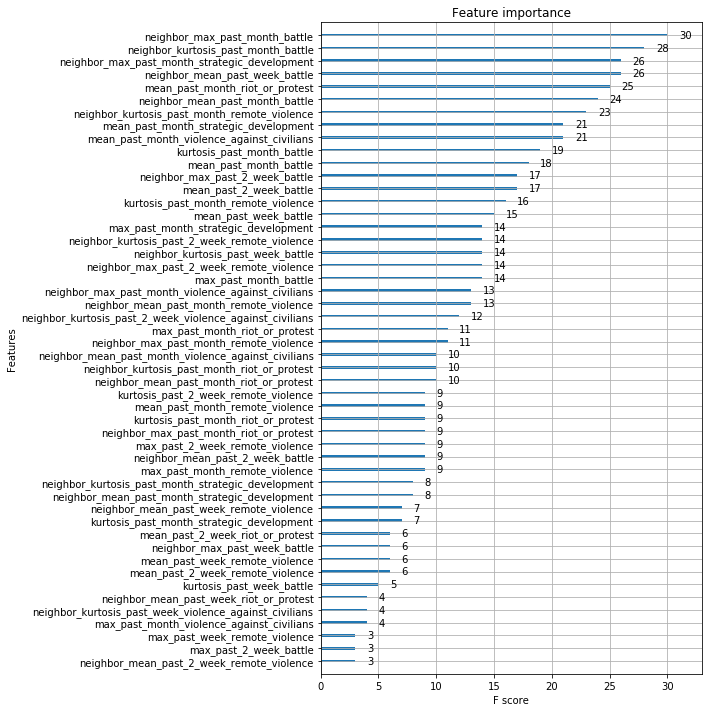

In [238]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
xgboost.plot_importance(xgb, max_num_features=50, ax=ax)
fig.tight_layout()
fig.savefig('/Users/Rohil/Documents/iGEM/yemen/feature_engineering/conflict_plots/xgb_feature_importance.png')

In [237]:
%matplotlib inline